In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [185]:
a = yf.Ticker("SHREECEM.NS")
df0 = a.history(start = "2010-01-01", end = "2022-01-01")

In [186]:
def Stochastic(df2, period):
    df = df2
    df["period low"] = df["Low"].rolling(period).min()
    df["period high"] = df["High"].rolling(period).max()
    df["%k"] = ((df["Close"]-df["period low"])/(df["period high"]-df["period low"]))*100
    df["%d"] = df["%k"].rolling(3).mean()
    
    return df

In [187]:
def MACD(df3, short, long, signal):
    df = df3
    df["Short Term EMA"] = df["Close"].ewm(span=short, min_periods=short).mean()
    df["Long Term EMA"] = df["Close"].ewm(span=long, min_periods=long).mean()
    df["MACD"] = df["Short Term EMA"] - df["Long Term EMA"]
    df["Signal"] = df["MACD"].ewm(span=signal, min_periods=signal).mean()
    
    return df

In [188]:
df1  = MACD(df0, 12, 26, 9) 
df1 = Stochastic(df0, 14)
df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Short Term EMA,Long Term EMA,MACD,Signal,period low,period high,%k,%d
Date,,,,,,,,,,,,,,,
2010-01-04,1808.768551,1855.749553,1792.560106,1843.957275,6976,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1879.240341,1940.315652,1861.387558,1921.617188,19634,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,1935.617663,2305.922085,1908.509642,1991.290161,29100,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2015.485701,2183.348789,1996.787347,2116.635742,36846,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2134.817380,2175.221054,2067.258771,2086.004150,16820,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,26055.104841,26343.741394,25806.159753,26189.562500,7736,0.0,0,26109.888540,26393.784016,-283.895477,-386.185996,24899.617851,26529.094908,79.163106,80.249096
2021-12-28,26276.016854,26642.838078,26222.681200,26609.472656,18855,0.0,0,26186.747635,26409.760953,-223.013318,-353.551460,24899.617851,26642.838078,98.085989,85.791644
2021-12-29,26517.043374,26637.707067,26353.801420,26508.427734,25992,0.0,0,26236.236881,26417.069603,-180.832722,-319.007713,24899.617851,26642.838078,92.289537,89.846211


In [236]:
tradebook = []
longshort = []
timestamp = []
count = 0 
npl = 0
possqr = True
target = 0
stoploss = 0
days_till_trade = 0
profit_trades = 0
loss_trades = 0
total_trades = 0
prevpl = 0
sum_profit = 0
sum_loss = 0
drawdown = 0

for i in range(len(df1)-1):
    openp = df1["Open"].iloc[i]
    closep = df1["Close"].iloc[i]
    macd = df1["MACD"].iloc[i]
    macd_prev = df1["MACD"].iloc[i-1]
    signal = df1["Signal"].iloc[i]
    percentk = df1["%k"].iloc[i]
    percentd = df1["%d"].iloc[i]
    
    if(possqr==True and i<(len(df1)-2)):
        if(macd>signal and macd_prev<signal and percentk>percentd):
            longshort.append(1)
            tradebook.append(openp)
            timestamp.append(df1.index[i])
            npl -= openp
            count += 1
            possqr = False
            days_till_trade = 0
            stoploss = (openp - (openp*0.01))
            target = (openp + (openp*0.015))
            
            print(npl)
            print("long position entered\n")
      
        elif(macd<signal and macd_prev>signal and percentk<percentd):
            longshort.append(0)
            tradebook.append(openp)
            timestamp.append(df1.index[i])
            npl += openp
            count += 1
            possqr = False
            days_till_trade = 0
            stoploss = (openp + (openp*0.01))
            target = (openp - (openp*0.015))
            
            print(npl)
            print("short position entered\n")
            
    elif(possqr==False and i<(len(df1)-2)):
        if(longshort[count-1]==1 and (openp>=target or openp<=stoploss or macd<signal)):
            longshort.append(1)
            tradebook.append(openp)
            timestamp.append(df1.index[i])
            npl += openp
            count += 1
            possqr = True
            
            print(npl)
            print("long position squared\n")
            
            if(npl>prevpl):
                profit_trades += 1
                sum_profit += (npl - prevpl)
            elif(npl<prevpl):
                loss_trades += 1
                sum_loss += (prevpl - npl)
            if(drawdown>npl):
                drawdown = npl
            prevpl = npl
                
        elif(longshort[count-1]==0 and (openp<=target or openp>=stoploss or macd>signal)):
            longshort.append(0)
            tradebook.append(openp)
            timestamp.append(df1.index[i])
            npl -= openp
            count += 1
            possqr = True
            
            print(npl)
            print("short position squared\n")
            
            if(npl>prevpl):
                profit_trades += 1
                sum_profit += (npl - prevpl)
            elif(npl<prevpl):
                loss_trades += 1
                sum_loss += (prevpl - npl)
            if(drawdown>npl):
                drawdown = npl
            prevpl = npl
            
    elif(possqr==False and i==(len(df1)-2)):
        if(longshort[count-1]==1):
            longshort.append(1)
            tradebook.append(openp)
            timestamp.append(df1.index[i])
            npl += openp
            count += 1
            possqr = True
            
            print(npl)
            print("long position squared\n")
            
            if(npl>prevpl):
                profit_trades += 1
                sum_profit += (npl - prevpl)
            elif(npl<prevpl):
                loss_trades += 1
                sum_loss += (prevpl - npl) 
            if(drawdown>npl):
                drawdown = npl
            prevpl = npl
            
        elif(longshort[count-1]==0):            
            longshort.append(0)
            tradebook.append(openp)
            timestamp.append(df1.index[i])
            npl -= openp
            count += 1
            possqr = True
            
            print(npl)
            print("short position squared\n")
            
            if(npl>prevpl):
                profit_trades += 1
                sum_profit += (npl - prevpl)
            elif(npl<prevpl):
                loss_trades += 1
                sum_loss += (prevpl - npl) 
            if(drawdown>npl):
                drawdown = npl
            prevpl = npl


print(npl)
print("\n")
print(tradebook)
print("\n")
print(timestamp)
print("\n")

total_trades = (len(tradebook)/2)
print("total trades =") 
print(total_trades)
print("profitable trades =")
print(profit_trades)
print("loss making trades =")
print(loss_trades)

#trades are based on assumption that 1 stock is traded. Final value of 25,000 will be calculated later.


-2175.733463798015
long position entered

43.326853814109654
long position squared

2265.5888175495547
short position entered

85.14576329434158
short position squared

-1932.3527155283903
long position entered

8.948516308562375
long position squared

-1931.3165994180192
long position entered

-24.01735263161254
long position squared

-1966.166061810547
long position entered

-54.15752818706483
long position squared

1832.1376745217917
short position entered

-75.16144869333698
short position squared

-1792.273277320697
long position entered

5.253869519705177
long position squared

-1700.0796057838706
long position entered

43.143529816564524
long position squared

2003.394403726705
short position entered

22.708325664444146
short position squared

-1982.0075882747494
long position entered

0.04984653622773294
long position squared

2055.8538018231357
short position entered

45.93422116101419
short position squared

1997.1025031525746
short position entered

117.92946647018516
short 

In [237]:
Wins = profit_trades
Losses = loss_trades
Win_percent = (profit_trades/total_trades)*100
Loss_percent = (loss_trades/total_trades)*100
win_returns = sum_profit
loss_returns = sum_loss
win_avg = sum_profit/profit_trades
loss_avg = sum_loss/loss_trades

print(Wins, Losses, Win_percent, Loss_percent, win_returns, loss_returns, drawdown, win_avg, loss_avg)

154 49 75.86206896551724 24.137931034482758 57858.9696072581 8326.277064237649 -75.16144869333698 375.7075948523253 169.92402171913568


In [238]:
max_drawdown_percent = (-1)*(drawdown/tradebook[0])*100
print(max_drawdown_percent)

3.4545338362417457


In [239]:
CAGR_percent = (pow(((npl+tradebook[0])/tradebook[0]),(1/12)) - 1)*100
CAGR_percent

30.21558575588015

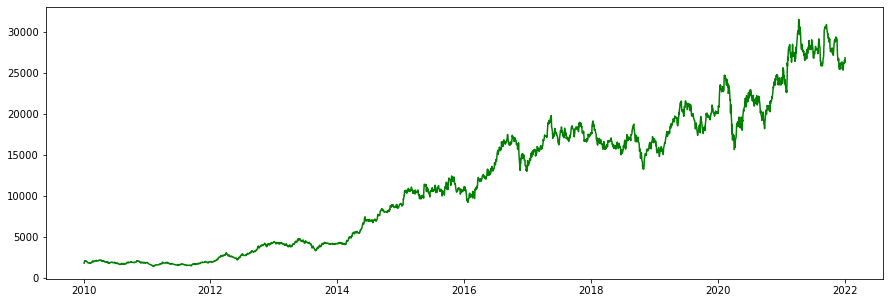

In [242]:
plt.figure(figsize=(15,5))
plt.plot(df1["Close"], color = "green")

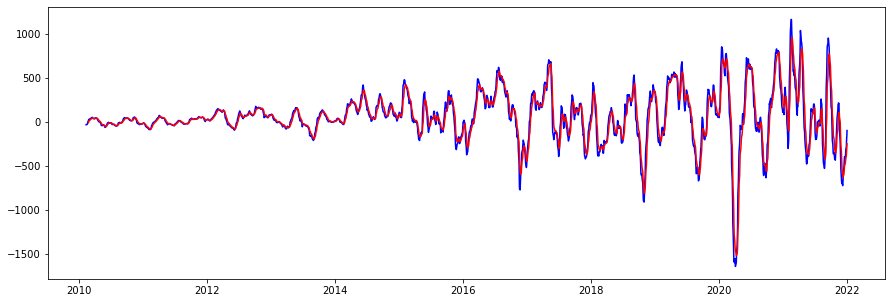

In [243]:
plt.figure(figsize=(15,5))
plt.plot(df1["MACD"], color = "blue")
plt.plot(df1["Signal"], color = "red")

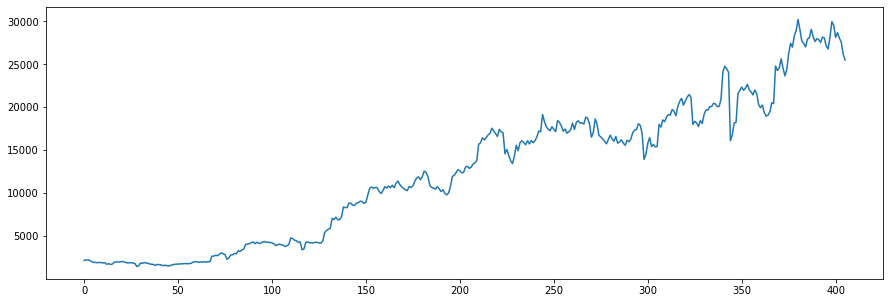

In [244]:
plt.figure(figsize=(15,5))
plt.plot(tradebook)